In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('used_car.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
## Too many nan values so drop it
df_new=df.drop(columns={'New_Price','Unnamed: 0'},axis=1)

In [8]:
df_new['Name'].unique().shape

(1876,)

In [9]:
df_new['Company']=df_new['Name'].apply(lambda x:x.split()[0])
df_new.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [10]:
df_new['Mileage']=df_new['Mileage'].fillna(df_new['Mileage'].mode())
df_new['Mileage']=df_new['Mileage'].str.split().str[0]
df_new['Mileage']=df_new['Mileage'].astype('float')
df_new['Mileage']=df_new['Mileage'].replace(0,18.15)

In [11]:
df_new['Engine']=df_new['Engine'].fillna('NaN CC')
df_new['Engine']=df_new['Engine'].str.split().str[0]
df_new['Engine']=df_new['Engine'].astype('float')



In [12]:
df_new['Engine'].describe()

count    5983.000000
mean     1621.276450
std       601.355233
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

In [13]:
df_new['Engine']=df_new['Engine'].replace('NaN CC',1493)

In [14]:
df_new['Power']=df_new['Power'].fillna('Nan bhp')

In [15]:
df_new['Power']=df_new['Power'].str.split().str[0]
df_new['Power']=df_new['Power'].replace('null',0)
df_new['Power']=df_new['Power'].astype('float')
df_new['Power']

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 6019, dtype: float64

In [17]:
null_col={'Nan bhp',0}
df_new['Power']=df_new['Power'].replace(null_col,92)

In [19]:
df_new.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Company               0
dtype: int64

In [18]:
df_new.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6017.00000,5983.000000,5983.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,18.34008,1621.276450,111.227632,5.278735,9.479468
std,3.269742,9.126884e+04,4.15186,601.355233,55.460923,0.808840,11.187917
min,1998.000000,1.710000e+02,6.40000,72.000000,0.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.40000,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.15000,1493.000000,92.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.10000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.54000,5998.000000,560.000000,10.000000,160.000000


In [20]:
## Seats and Mileage can't be zero, Hence replace it with Mean value
df_new['Seats']=df_new['Seats'].replace(0,5)
df_new['Mileage']=df_new['Mileage'].replace(0,18.15)
df_new['Power']=df_new['Power'].replace(0,92)

In [21]:
## Handling Nan values
df_new['Mileage']=df_new['Mileage'].fillna(18.15)
df_new['Engine']=df_new['Engine'].fillna(18.15)
df_new['Seats']=df_new['Seats'].fillna(5)
df_new['Power']=df_new['Power'].fillna(92.70)

In [23]:
df_new.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.340017,1611.688054,112.752304,5.277621,9.479468
std,3.269742,9.126884e+04,4.151171,612.165704,53.327748,0.803479,11.187917
min,1998.000000,1.710000e+02,6.400000,18.150000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.400000,1197.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,92.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [24]:
df_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


Text(0, 0.5, 'Number of Cars')

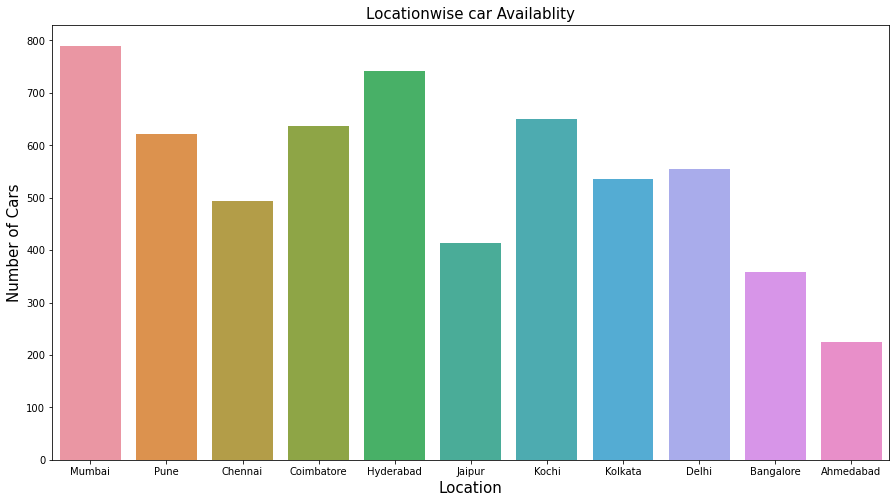

In [28]:
plt.figure(figsize=(15,8))
plt.title('Locationwise car Availablity',fontsize=15)
sns.countplot(df_new['Location'],data=df_new)
plt.xlabel('Location',fontsize=15)
plt.ylabel('Number of Cars',fontsize=15)

[]

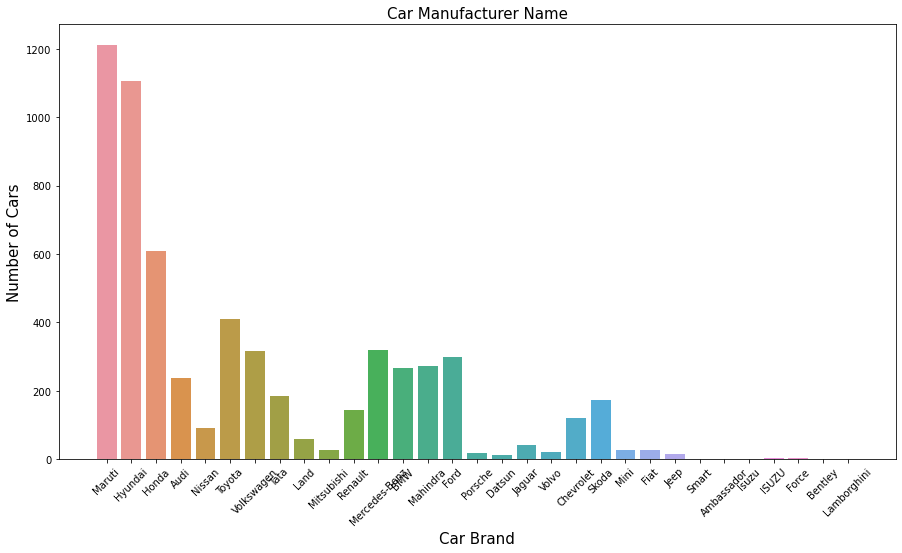

In [32]:
plt.figure(figsize=(15,8))
plt.title('Car Manufacturer Name',fontsize=15)
sns.countplot(df_new['Company'],data=df_new)
plt.xlabel('Car Brand',fontsize=15)
plt.ylabel('Number of Cars',fontsize=15)
plt.xticks(rotation=45)
plt.plot()

Text(0, 0.5, 'Number of Cars')

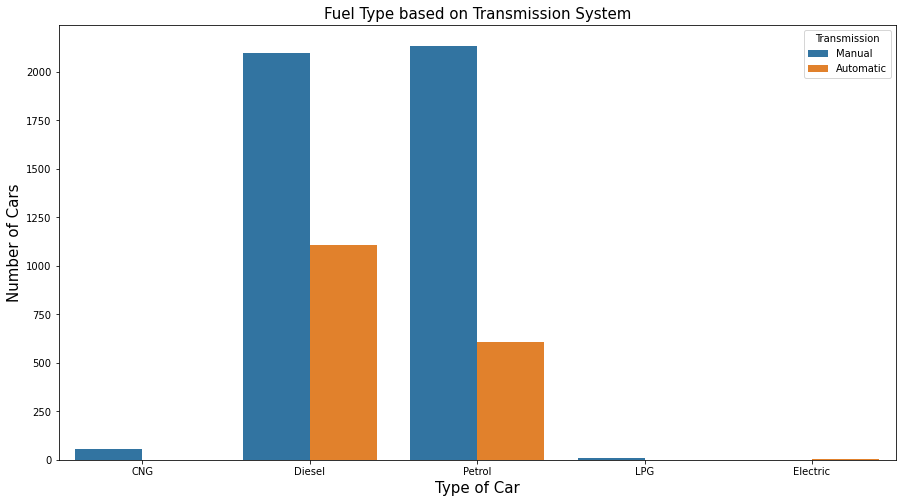

In [37]:
plt.figure(figsize=(15,8))
plt.title('Fuel Type based on Transmission System',fontsize=15)
sns.countplot(x=df_new['Fuel_Type'],hue=df_new['Transmission'],data=df_new)
plt.xlabel('Type of Car',fontsize=15)
plt.ylabel('Number of Cars',fontsize=15)

In [39]:
Tr=df_new.groupby('Company')['Transmission']

In [48]:
look=df_new[['Company','Transmission']]

In [55]:
auto=look[look['Transmission']=='Automatic']

Text(0, 0.5, 'Number of Cars')

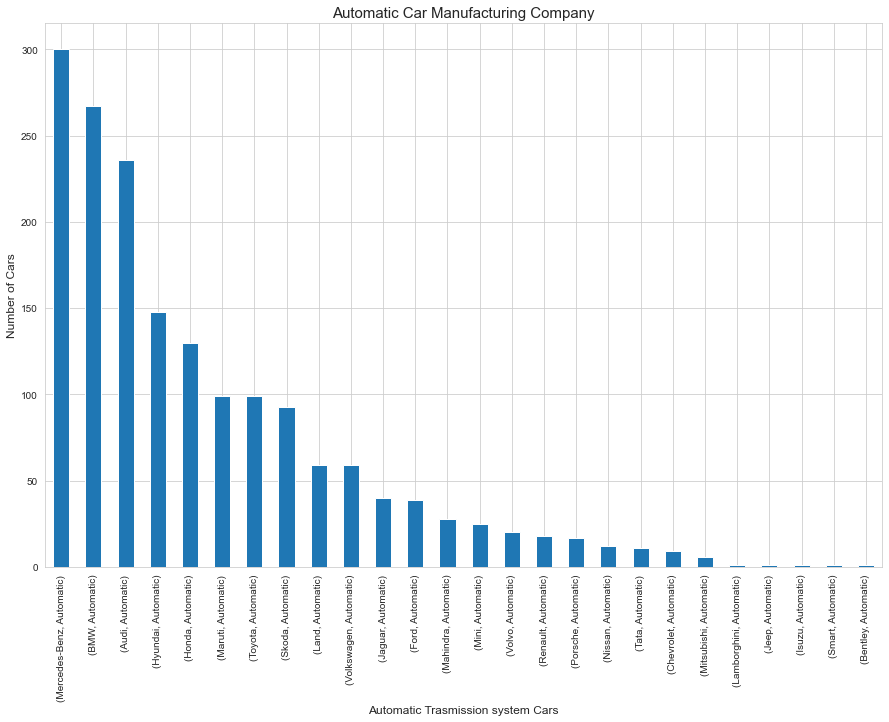

In [60]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
plt.title('Automatic Car Manufacturing Company',fontsize=15)
auto.value_counts().plot(kind='bar')
plt.xlabel('Automatic Trasmission system Cars',fontsize=12)
plt.ylabel('Number of Cars',fontsize=12)

In [83]:
Top_20=df_new[df_new['Mileage']>20]
Top_20

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,Hyundai
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20,Volkswagen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005,Maruti Vitara Brezza VDi,Pune,2016,37208,Diesel,Manual,First,24.30,1248.0,88.50,5.0,7.43,Maruti
6013,Honda Amaze VX i-DTEC,Coimbatore,2015,70602,Diesel,Manual,First,25.80,1498.0,98.60,5.0,4.83,Honda
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Maruti
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Hyundai


Text(0, 0.5, 'Mileage')

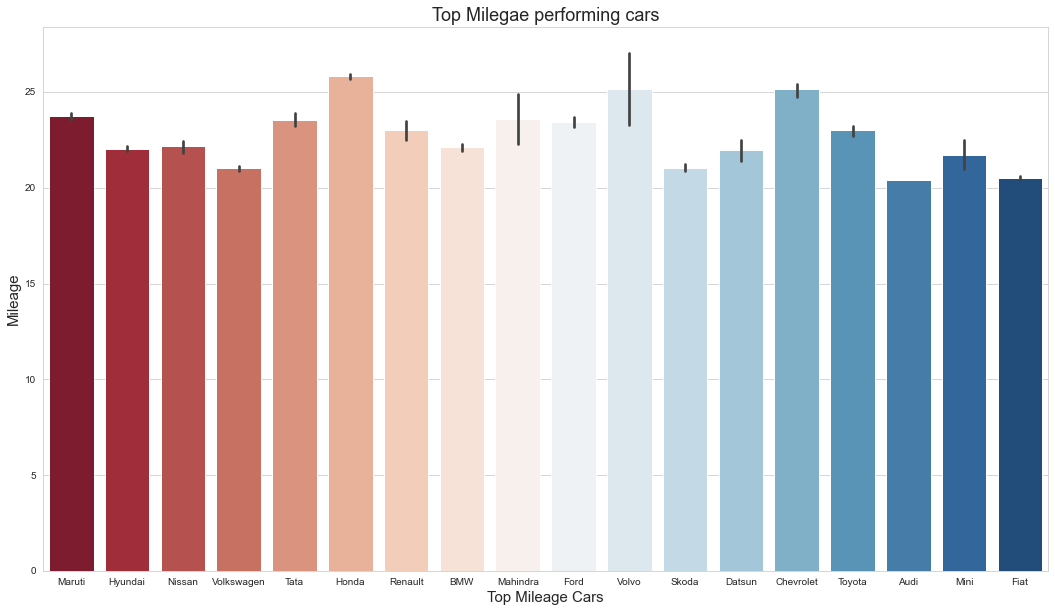

In [90]:
plt.figure(figsize=(18,10))
plt.title('Top Milegae performing cars',fontsize=18)
sns.barplot(x=Top_20['Company'],y=Top_20['Mileage'],data=Top_20,palette="RdBu")
plt.xlabel('Top Mileage Cars',fontsize=15)
plt.ylabel('Mileage',fontsize=15)

In [96]:
low_20=df_new[df_new['Mileage']<10]
low_20.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
70,Porsche Cayenne 2009-2014 Turbo,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.0,5.0,14.5,Porsche
152,Mercedes-Benz S Class 2005 2013 S 500,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,30.0,Mercedes-Benz
326,BMW 6 Series 640d Gran Coupe,Mumbai,2011,30000,Diesel,Automatic,First,9.52,2993.0,313.0,4.0,49.0,BMW


Text(0, 0.5, 'Mileage')

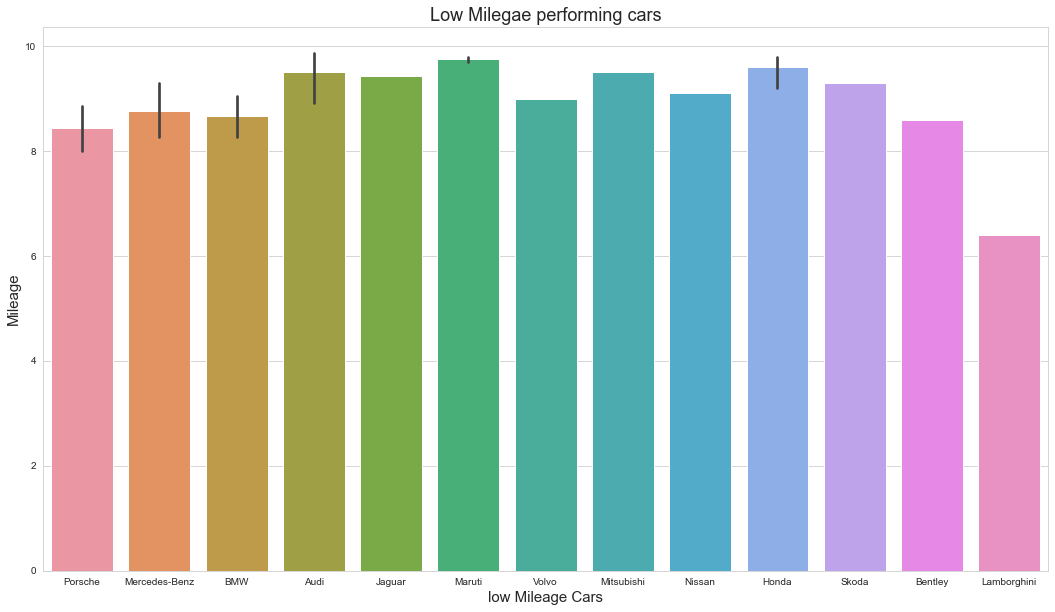

In [95]:
plt.figure(figsize=(18,10))
plt.title('Low Milegae performing cars',fontsize=18)
sns.barplot(x=low_20['Company'],y=low_20['Mileage'],data=low_20)
plt.xlabel('low Mileage Cars',fontsize=15)
plt.ylabel('Mileage',fontsize=15)

In [97]:
Top_Engine=df_new[df_new['Engine']>2500]
Top_Engine.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.5,8.0,17.5,Toyota
32,Mahindra Ssangyong Rexton RX7,Bangalore,2013,72000,Diesel,Automatic,Second,11.18,2696.0,184.0,7.0,12.5,Mahindra
33,Audi A6 2.7 TDI,Kolkata,2010,35000,Diesel,Automatic,First,12.40,2698.0,179.5,5.0,11.5,Audi


Text(0, 0.5, 'CC')

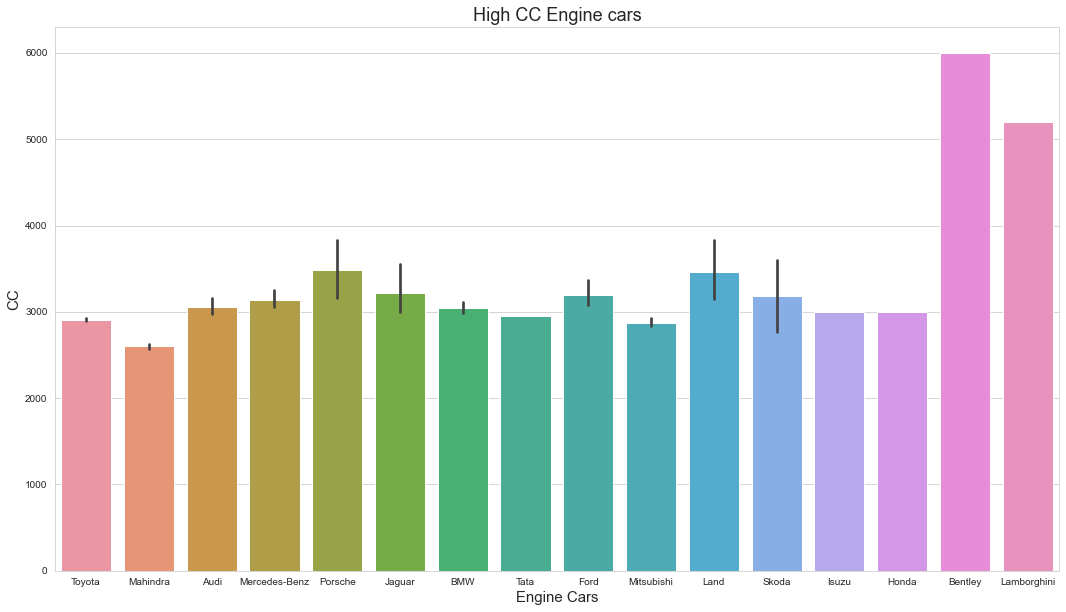

In [99]:
plt.figure(figsize=(18,10))
plt.title('High CC Engine cars',fontsize=18)
sns.barplot(x=Top_Engine['Company'],y=Top_Engine['Engine'],data=Top_Engine)
plt.xlabel('Engine Cars',fontsize=15)
plt.ylabel('CC',fontsize=15)

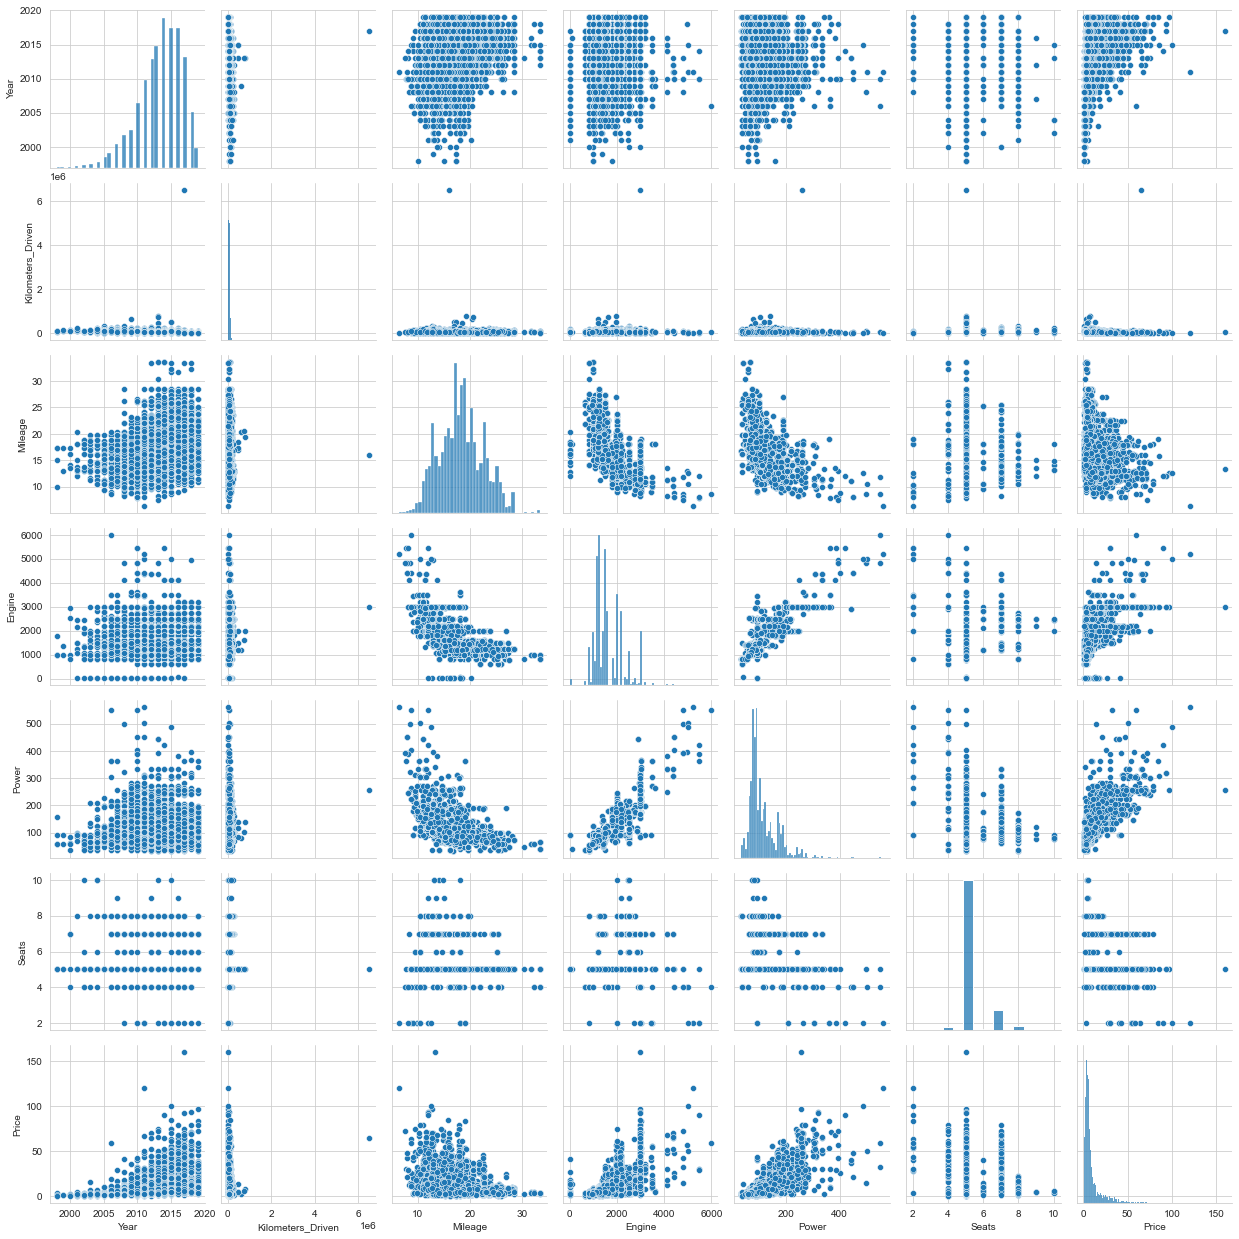

In [100]:
sns.pairplot(df_new)

<AxesSubplot:>

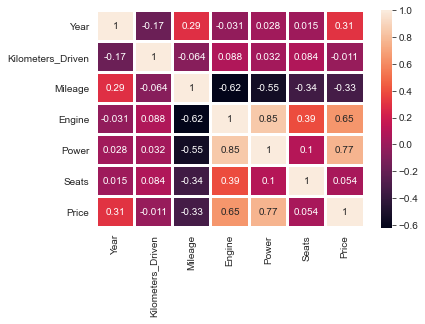

In [101]:
sns.heatmap(df_new.corr(),annot=True,linewidths=2)

In [102]:
df_new['year_old']=2021-df_new['Year']

In [105]:
df_new.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Company', 'year_old'],
      dtype='object')

# Encoding

In [106]:
df_new=pd.get_dummies(data=df_new,columns={'Location','Fuel_Type','Transmission','Owner_Type','Company'},drop_first=True)

In [107]:
df_new.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,year_old,Company_Audi,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,Maruti Wagon R LXI CNG,2010,72000,26.60,998.0,58.16,5.0,1.75,11,0,...,0,0,0,0,1,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,12.50,6,0,...,0,0,0,0,0,1,1,0,0,0
2,Honda Jazz V,2011,46000,18.20,1199.0,88.70,5.0,4.50,10,0,...,0,0,0,0,0,0,0,0,0,1
3,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,6.00,9,0,...,0,0,0,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,17.74,8,1,...,0,0,0,0,0,0,1,0,0,0


In [108]:
df_new.drop(columns={'Name','Year'},axis=1,inplace=True)

In [109]:
df_new.shape

(6019, 55)

In [110]:
x=df_new.drop(columns={'Price'},axis=1)
y=df_new['Price']

In [119]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
x['Kilometers_Driven']=minmax.fit_transform(x[['Kilometers_Driven']])
x['Mileage']=minmax.fit_transform(x[['Mileage']])
x['Engine']=minmax.fit_transform(x[['Engine']])
x['Power']=minmax.fit_transform(x[['Power']])
x['Seats']=minmax.fit_transform(x[['Seats']])
x['year_old']=minmax.fit_transform(x[['year_old']])

In [122]:
x.head(5)

,Kilometers_Driven,Mileage,Engine,Power,Seats,year_old,Company_Audi,Company_BMW,Company_Bentley,Company_Chevrolet,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0.011051,0.744289,0.163859,0.045569,0.375,0.428571,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.006282,0.488946,0.261520,0.174971,0.375,0.190476,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0.007051,0.434783,0.197472,0.103652,0.375,0.380952,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.013359,0.529477,0.205666,0.103766,0.625,0.333333,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.006231,0.324245,0.326070,0.202739,0.375,0.285714,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Train_Test_split

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=43)

In [124]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4514, 54), (1505, 54), (4514,), (1505,))

# Model Buliding

In [125]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [126]:
lr.fit(x_train,y_train)

LinearRegression()

In [127]:
lr.score(x_train,y_train)

0.7795888235328919

In [128]:
pred=lr.predict(x_test)

In [130]:
lr.coef_

array([-1.28542093e+02, -2.30713067e+00,  6.68869908e+00,  4.69838887e+01,
        2.62956619e+00, -1.88142953e+01,  8.00523763e-01,  6.88721731e-01,
        4.52133624e+00, -8.63161811e+00, -1.00803497e+01, -7.66985127e+00,
       -1.03588171e+01, -7.32660862e+00, -8.90513391e+00, -8.11092890e+00,
       -1.01884471e+01, -8.65509691e+00,  7.17778622e+00, -7.27170992e+00,
        3.05533376e-13,  1.28951865e+01, -1.05994841e+01, -6.96306735e+00,
        1.95875039e+00,  6.76329688e+00, -7.16562912e+00, -8.23310445e+00,
        8.17763474e+00, -8.74337201e+00, -8.22619119e+00, -3.20132629e+00,
       -8.95542683e+00, -6.28810830e+00, -8.82215177e+00, -4.88226743e+00,
        8.23131689e-01, -5.82864669e-01,  5.82350066e-01, -4.51799052e-03,
        2.10338085e+00,  1.38727527e+00,  2.31567327e+00, -5.26379863e-01,
        1.55900211e+00,  1.13786824e+00, -1.46386814e-02, -1.19511680e+00,
       -6.44485511e-01,  5.38564383e-01, -4.68341276e-03,  1.06513539e+01,
        1.17651067e+00, -

# Model Evaluation

In [131]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [133]:
print('Error')
print('MEA:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSR:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score',r2_score(y_test,pred))

Error
MEA: 2.8587092425537532
MSE: 46.298350094883
RMSR: 6.804289095481099
R2_score 0.6258826277469856


<AxesSubplot:xlabel='Price'>

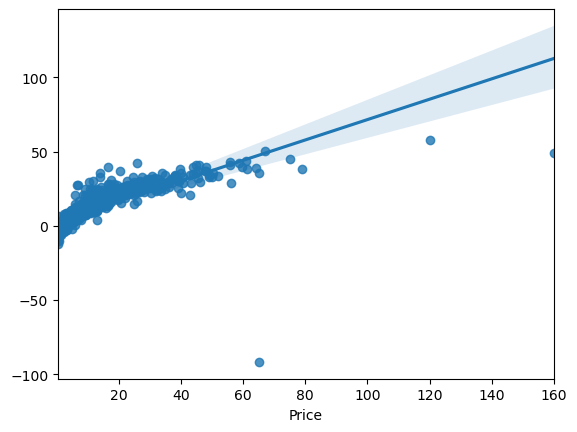

In [140]:
sns. reset_defaults()
sns.regplot(y_test,pred)

<AxesSubplot:ylabel='Density'>

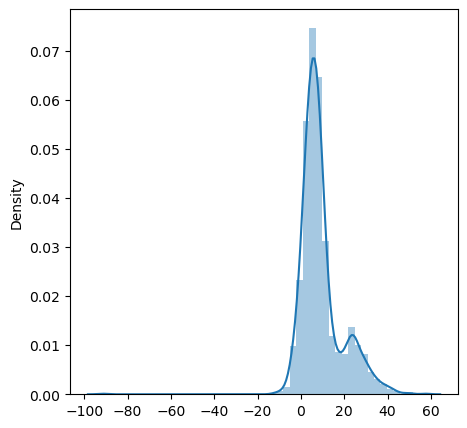

In [143]:
plt.figure(figsize=(5,5))
sns.distplot(pred)

# Ridge Regression

In [144]:
from sklearn.linear_model import Ridge,Lasso

In [145]:
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [146]:
ridge.score(x_train,y_train)

0.77669183268543

In [147]:
ridgepred=ridge.predict(x_test)

In [148]:
print('Error')
print('MEA:',mean_absolute_error(y_test,ridgepred))
print('MSE:',mean_squared_error(y_test,ridgepred))
print('RMSR:',np.sqrt(mean_squared_error(y_test,ridgepred)))
print('R2_score',r2_score(y_test,ridgepred))

Error
MEA: 2.7666059294312415
MSE: 32.17165217287833
RMSR: 5.6720060095946945
R2_score 0.7400344948083697


# Lasso Regression

In [149]:
lasso=Lasso()

In [150]:
lasso.fit(x_train,y_train)

Lasso()

In [153]:
lasso.score(x_train,y_train)

0.3509292045354072

In [154]:
predlasso=lasso.predict(x_test)

In [156]:
print('Error')
print('MEA:',mean_absolute_error(y_test,predlasso))
print('MSE:',mean_squared_error(y_test,predlasso))
print('RMSR:',np.sqrt(mean_squared_error(y_test,predlasso)))
print('R2_score',r2_score(y_test,predlasso))

Error
MEA: 5.100606426981758
MSE: 84.30897124170873
RMSR: 9.18199168164014
R2_score 0.31873488550536766


In [159]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [161]:
r=Ridge()
parameters={'alpha':[1e-10,1e-5,1e-2,1,5,15,30]}
l=GridSearchCV(r,parameters,scoring='r2',cv=5)
l.fit(x_train,y_train)
prediction=l.predict(x_test)
print('MAE: ',mean_absolute_error(y_test,prediction))
print('MSE: ',mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared: ',r2_score(y_test,prediction))

MAE:  2.848836860059308
MSE:  44.10398347520932
RMSE:  6.64108300469203
R squared:  0.6436143756781667


In [163]:
r=Ridge()
parameters={'alpha':[1,20]}
rl=RandomizedSearchCV(r,parameters,scoring="neg_mean_squared_error",cv=5)
rl.fit(x_train,y_train)
prediction = rl.predict(x_test)
print('MAE: ',mean_absolute_error(y_test,prediction))
print('MSE: ',mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared: ',r2_score(y_test,prediction))

MAE:  2.7666059294312415
MSE:  32.17165217287833
RMSE:  5.6720060095946945
R squared:  0.7400344948083697


In [165]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9863783238894335

In [178]:
prediction = rf.predict(x_test)
print('MAE: ',mean_absolute_error(y_test,prediction))
print('MSE: ',mean_squared_error(y_test,prediction))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,prediction)))
print('R squared: ',r2_score(y_test,prediction))

MAE:  1.3987427440278437
MSE:  18.490761548595188
RMSE:  4.300088551250449
R squared:  0.8505839817760142


<AxesSubplot:xlabel='Price'>

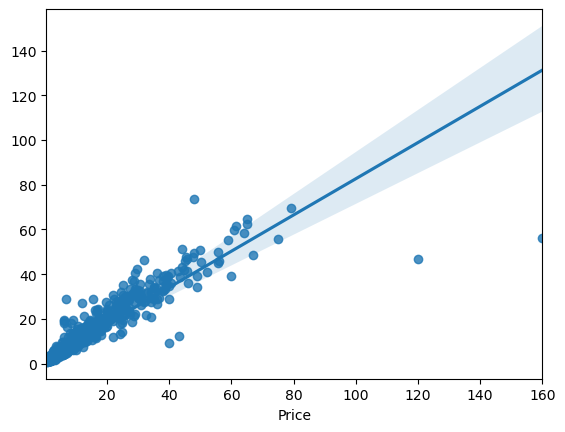

In [180]:
sns.regplot(y_test,prediction)

<AxesSubplot:ylabel='Density'>

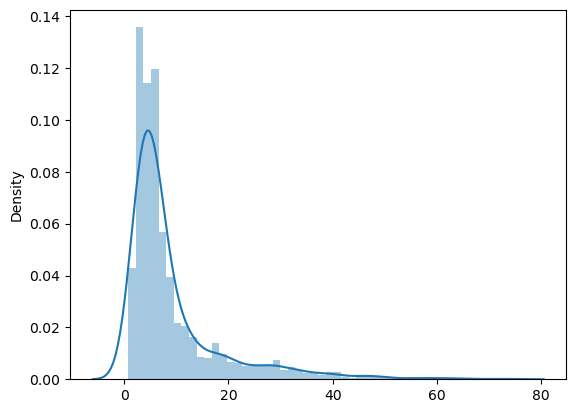

In [181]:
sns.distplot(prediction)

In [183]:
#save the model
import pickle
filename='carpricerf.pkl'
pickle.dump(rf,open(filename,'wb'))